In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['MA20'] = ms['Close'].rolling(20).mean()
ms['MA60'] = ms['Close'].rolling(60).mean()
ms = ms.dropna()
ms.head()



,Open,High,Low,Close,Adj Close,Volume,MA20,MA60
Date,,,,,,,,
2015-03-27,41.119999,41.430000,40.830002,40.970001,38.062588,33820300,42.264,43.675000
2015-03-30,41.099998,41.540001,40.910000,40.959999,38.053295,35049700,42.118,43.583500
2015-03-31,40.779999,41.029999,40.540001,40.660000,37.774593,34887200,41.987,43.481833
2015-04-01,40.599998,40.759998,40.310001,40.720001,37.830330,36752000,41.870,43.388333
2015-04-02,40.660000,40.740002,40.119999,40.290001,37.430840,37487500,41.729,43.299000


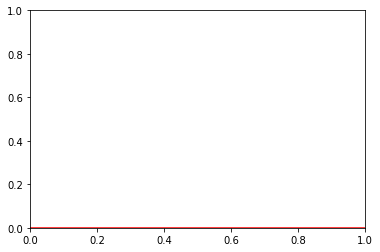

In [30]:
ms['Shares'] = [1 if ms.loc[ei,'MA20']>ms.loc[ei,'MA60'] else 0 for ei in ms.index]
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
plt.axhline(y=0, color='red')

In [31]:
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA60,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,89.8285,86.110500,1,95.010002,2.270004,33.600005
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,90.2815,86.293167,1,94.260002,-0.750000,32.850005
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,90.6770,86.461833,1,91.779999,-2.480003,30.370002
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,90.9105,86.583667,1,88.000000,-3.779999,26.590003
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,90.9010,86.645833,1,NaN,NaN,NaN


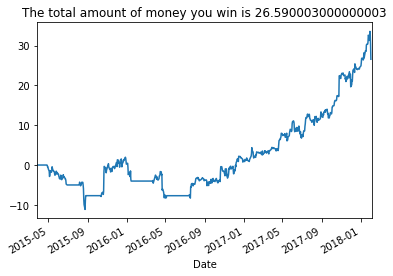

In [35]:
ms['wealth'].plot()
plt.title('The total amount of money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))